In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GENERATING SYNTHETIC DATA

In [24]:
students = 1000

In [25]:
student_data = pd.DataFrame({
    'student_id': range(1, students + 1),
    'course': np.random.choice(['Computer Science', 'Mechanical Engineering', 'Electrical Engineering', 'Civil Engineering', 'Chemical Engineering'], students),
    'year': np.random.choice([1, 2, 3, 4], students),
    'interests': np.random.choice(['AI', 'Blockchain', 'Data Science', 'Environmental Science','Fintech', 'Robotics', 'IOT','Sustainablity', 'Embedded Systems'], students),
    'average_quiz_score': np.random.randint(60, 100, students) 
}) 

print(student_data.head(20))

    student_id                  course  year              interests  \
0            1  Electrical Engineering     2           Data Science   
1            2       Civil Engineering     1                     AI   
2            3        Computer Science     4                    IOT   
3            4    Chemical Engineering     2               Robotics   
4            5       Civil Engineering     3             Blockchain   
5            6        Computer Science     2                     AI   
6            7  Mechanical Engineering     4           Data Science   
7            8  Electrical Engineering     1                     AI   
8            9    Chemical Engineering     4           Data Science   
9           10        Computer Science     4          Sustainablity   
10          11  Electrical Engineering     3               Robotics   
11          12    Chemical Engineering     3                     AI   
12          13  Mechanical Engineering     3                    IOT   
13    

In [26]:
num_materials = 100  
material_data = pd.DataFrame({
    'material_id': range(1, num_materials + 1),
    'subject': np.random.choice(['AI', 'Blockchain', 'Data Science', 'Robotics', 'Environmental Science'], num_materials),
    'difficulty': np.random.choice(['Easy', 'Medium', 'Hard'], num_materials),
    'popularity': np.random.randint(1, 100, num_materials),  
    'content_length': np.random.randint(10, 60, num_materials) 
})

print(material_data.head(10))

   material_id       subject difficulty  popularity  content_length
0            1  Data Science       Easy          99              22
1            2    Blockchain       Easy          99              23
2            3            AI       Hard          49              32
3            4  Data Science       Easy          56              10
4            5    Blockchain       Easy           8              58
5            6            AI     Medium          23              27
6            7            AI       Easy           3              13
7            8      Robotics     Medium          80              56
8            9    Blockchain     Medium          12              49
9           10    Blockchain       Easy          32              32


In [27]:
engagement_data = pd.DataFrame({
    'student_id': np.random.randint(1, students + 1, 200), 
    'material_id': np.random.randint(1, num_materials + 1, 200),
    'views': np.random.randint(1, 10, 200),  
    'rating(out of 5)': np.random.randint(1, 6, 200)  
})

print(engagement_data.head())

   student_id  material_id  views  rating(out of 5)
0         673           48      8                 3
1         548           84      6                 5
2         784           40      9                 1
3         330            5      7                 4
4         497           96      1                 5


# BUILDING ALGORITHM

In [28]:
merged_data = engagement_data.merge(student_data, on='student_id').merge(material_data, on='material_id')

In [29]:
def calc_recommendation_score(row, interests_weight=0.3, performance_weight=0.3, popularity_weight=0.2, views_weight=0.2):
    interest_match = 1 if row['subject'] == row['interests'] else 0
    if row['average_quiz_score'] < 70 and row['difficulty'] == 'Easy':
        performance_fit = 1
    elif 70 <= row['average_quiz_score'] <= 85 and row['difficulty'] == 'Medium':
        performance_fit = 1
    elif row['average_quiz_score'] > 85 and row['difficulty'] == 'Hard':
        performance_fit = 1
    else:
        performance_fit = 0
    popularity_score = row['popularity'] / material_data['popularity'].max()
    views_score = row['views'] / engagement_data['views'].max()

    final_score = (interests_weight * interest_match +
                   performance_weight * performance_fit +
                   popularity_weight * popularity_score +
                   views_weight * views_score)

    return final_score

In [30]:
merged_data['recommendation_score'] = merged_data.apply(calc_recommendation_score, axis=1)
recommendations = merged_data.groupby('student_id').head(5)
print(recommendations[['student_id', 'material_id', 'recommendation_score']])

     student_id  material_id  recommendation_score
0           673           48              0.284848
1           548           84              0.175758
2           784           40              0.359596
3           330            5              0.471717
4           497           96              0.630303
..          ...          ...                   ...
195         393           10              0.153535
196         912           49              0.109091
197         204           35              0.250505
198         981           93              0.633333
199         893           84              0.197980

[200 rows x 3 columns]


In [31]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            200 non-null    int32  
 1   material_id           200 non-null    int32  
 2   views                 200 non-null    int32  
 3   rating(out of 5)      200 non-null    int32  
 4   course                200 non-null    object 
 5   year                  200 non-null    int32  
 6   interests             200 non-null    object 
 7   average_quiz_score    200 non-null    int32  
 8   subject               200 non-null    object 
 9   difficulty            200 non-null    object 
 10  popularity            200 non-null    int32  
 11  content_length        200 non-null    int32  
 12  recommendation_score  200 non-null    float64
dtypes: float64(1), int32(8), object(4)
memory usage: 14.2+ KB
None


In [32]:
merged_data.head()

,student_id,material_id,views,rating(out of 5),course,year,interests,average_quiz_score,subject,difficulty,popularity,content_length,recommendation_score
0,673,48,8,3,Civil Engineering,2,Data Science,65,AI,Medium,53,36,0.284848
1,548,84,6,5,Electrical Engineering,1,Robotics,61,AI,Medium,21,13,0.175758
2,784,40,9,1,Mechanical Engineering,3,Robotics,82,Environmental Science,Easy,79,41,0.359596
3,330,5,7,4,Mechanical Engineering,2,Data Science,68,Blockchain,Easy,8,58,0.471717
4,497,96,1,5,Electrical Engineering,4,Environmental Science,78,Environmental Science,Medium,4,28,0.630303


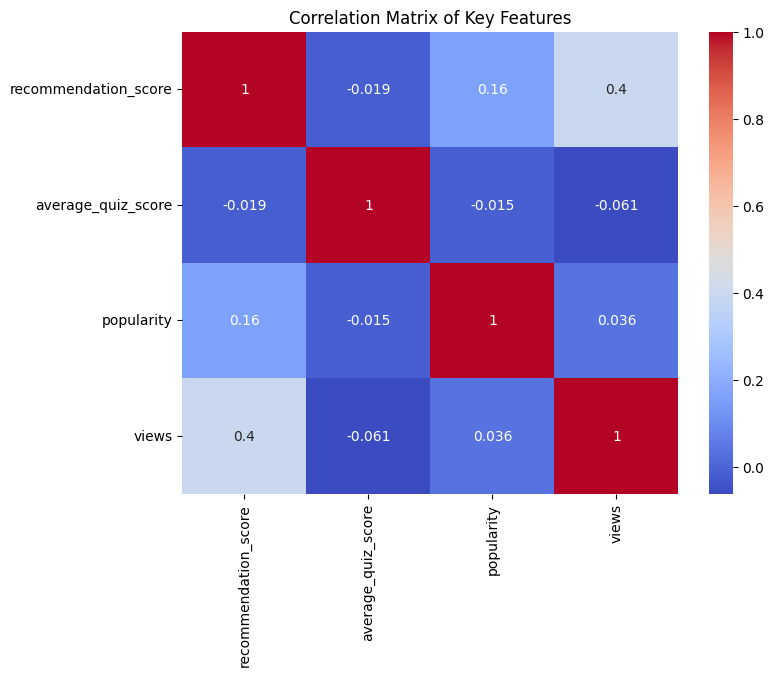

In [33]:
correlation = merged_data[['recommendation_score', 'average_quiz_score', 'popularity', 'views']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()

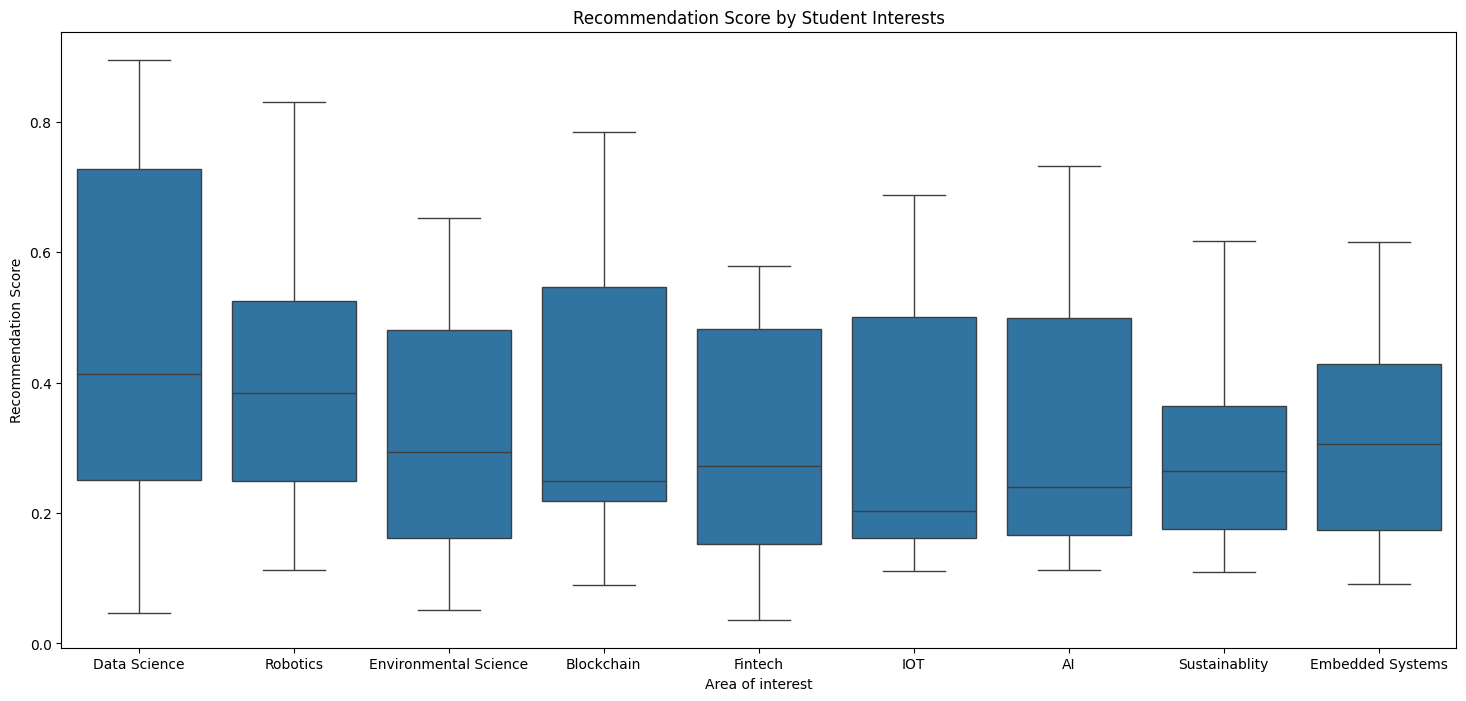

In [34]:
plt.figure(figsize=(18,8))
sns.boxplot(x='interests', y='recommendation_score', data=merged_data)
plt.title('Recommendation Score by Student Interests')
plt.xlabel('Area of interest')
plt.ylabel('Recommendation Score')
plt.show()

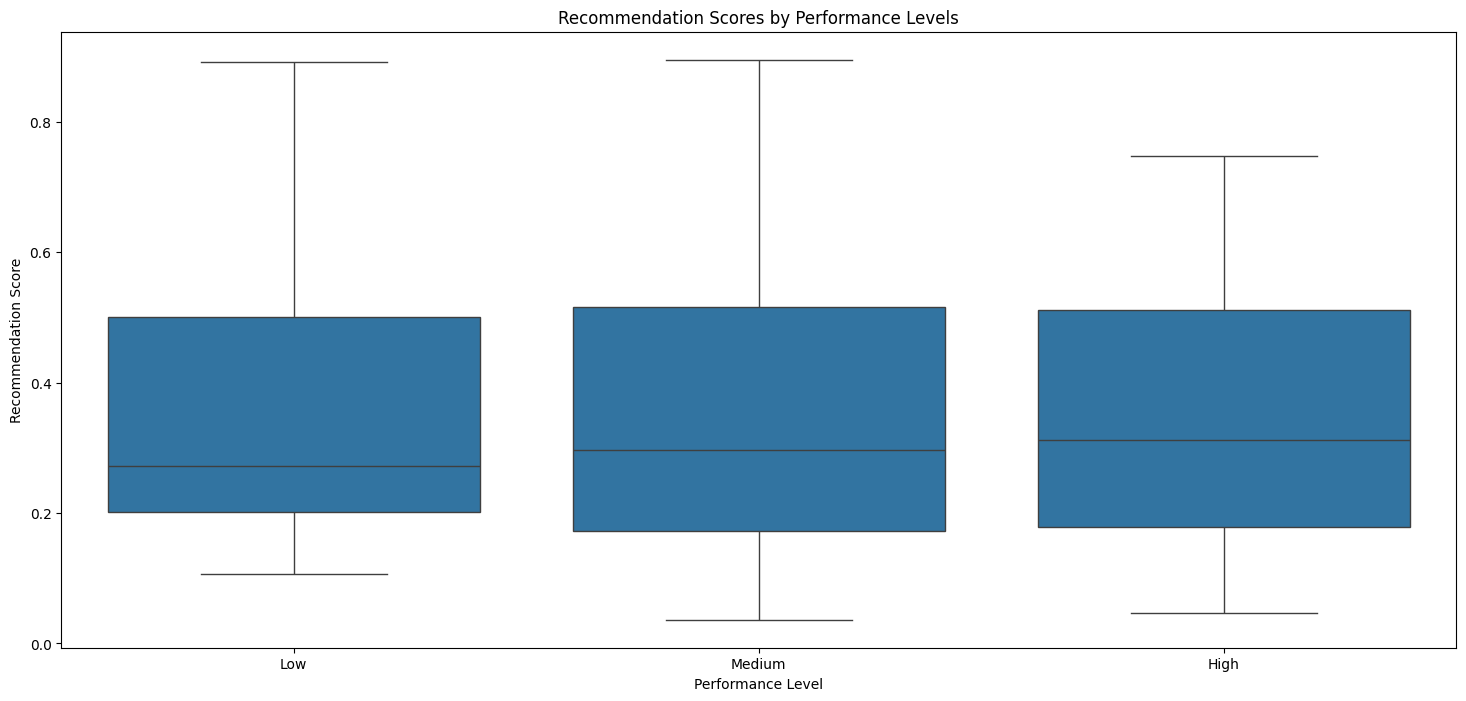

In [35]:
def categorize_performance(score):
    if score < 70:
        return 'Low'
    elif 70 <= score <= 85:
        return 'Medium'
    else:
        return 'High'

merged_data['performance_level'] = merged_data['average_quiz_score'].apply(categorize_performance)

# Boxplot of recommendation scores by performance levels
plt.figure(figsize=(18,8))
sns.boxplot(x='performance_level', y='recommendation_score', data=merged_data)
plt.title('Recommendation Scores by Performance Levels')
plt.xlabel('Performance Level')
plt.ylabel('Recommendation Score')
plt.show()

In [36]:
print("Recommendations structure:")
print(recommendations)

# Display recommendations
for rec in recommendations:
    student_id = rec[0]  
    recs = rec[1]        
    
    print(f"\nTop 5 recommendations for student {student_id}:")
    
    if isinstance(recs, list):  
        for material in recs:
            if isinstance(material, tuple) and len(material) == 2:  
                material_id, score = material
                print(f"Material ID: {material_id}, Score: {round(score, 2)}")
            else:
                print("Unexpected material structure:", material)
    else:
        print("Expected a list of recommendations but got:", recs)

Recommendations structure:
     student_id  material_id  views  rating(out of 5)                  course  \
0           673           48      8                 3       Civil Engineering   
1           548           84      6                 5  Electrical Engineering   
2           784           40      9                 1  Mechanical Engineering   
3           330            5      7                 4  Mechanical Engineering   
4           497           96      1                 5  Electrical Engineering   
..          ...          ...    ...               ...                     ...   
195         393           10      4                 2  Electrical Engineering   
196         912           49      1                 4       Civil Engineering   
197         204           35      6                 2       Civil Engineering   
198         981           93      9                 2  Mechanical Engineering   
199         893           84      7                 2  Mechanical Engineering   



In [37]:
recommendations = merged_data.groupby('student_id').apply(lambda x: x.nlargest(5, 'recommendation_score')).reset_index(drop=True)

# Display recommendations
print("Top recommendations for students:")
for index, rec in recommendations.iterrows():  # Iterate through each recommendation
    student_id = rec['student_id']
    material_id = rec['material_id']
    recommendation_score = rec['recommendation_score']
    
    print(f"Student {student_id} -> Recommended Material ID: {material_id}, Score: {round(recommendation_score, 2)}")

Top recommendations for students:
Student 9 -> Recommended Material ID: 26, Score: 0.87
Student 9 -> Recommended Material ID: 3, Score: 0.23
Student 12 -> Recommended Material ID: 49, Score: 0.18
Student 13 -> Recommended Material ID: 73, Score: 0.11
Student 17 -> Recommended Material ID: 63, Score: 0.24
Student 22 -> Recommended Material ID: 86, Score: 0.22
Student 36 -> Recommended Material ID: 54, Score: 0.48
Student 39 -> Recommended Material ID: 64, Score: 0.19
Student 43 -> Recommended Material ID: 4, Score: 0.52
Student 52 -> Recommended Material ID: 98, Score: 0.36
Student 56 -> Recommended Material ID: 58, Score: 0.16
Student 73 -> Recommended Material ID: 62, Score: 0.23
Student 79 -> Recommended Material ID: 34, Score: 0.05
Student 85 -> Recommended Material ID: 6, Score: 0.44
Student 94 -> Recommended Material ID: 48, Score: 0.5
Student 97 -> Recommended Material ID: 45, Score: 0.12
Student 101 -> Recommended Material ID: 8, Score: 0.18
Student 101 -> Recommended Material I

C:\Users\agraw\AppData\Local\Temp\ipykernel_8908\785538406.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recommendations = merged_data.groupby('student_id').apply(lambda x: x.nlargest(5, 'recommendation_score')).reset_index(drop=True)


# MEAN AVERAGE PRECISION(MAP)

In [38]:
from sklearn.metrics import average_precision_score
merged_data['relevant'] = merged_data['rating(out of 5)'] >= 4
average_precisions = merged_data.groupby('student_id').apply(
    lambda x: average_precision_score(x['relevant'], x['recommendation_score'])
)

print(f"Mean Average Precision (MAP): {average_precisions.mean()}")

c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y

Mean Average Precision (MAP): 0.4305555555555556


c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\agraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y